# Carcione et al. (2007), Figures 6-9

Reproduced by Dieter Werthmüller ([@prisae](https://github.com/prisae)).

> **Carcione, J. M., B. Ursin, and J. I. Nordskag, 2007**  
> Cross-property relations between electrical conductivity and the seismic velocity of rocks.  
> Geophysics, 72, E193-E204; DOI: [10.1190/1.2762224](https://doi.org/10.1190/1.2762224).


### Requirements
- `NumPy`
- `SciPy`
- `IPython`
- `Jupyter`
- `matplotlib`

**NOTE:** I created these scripts in the early stage of my PhD, somewhen in 2010/2011 (if you are interested in my thesis you can find it [here](https://werthmuller.org/research), it comes with all source code, unfortunately without the real data due to copyrights). It was my first go at Python, so don't be too harsh ;). Many things would probably be included in `bruges`, `welly`, or another package by now, I don't know. The only thing I did at this point was to extract the required functions and translate them from Python 2 to Python 3.

In [1]:
import numpy as np
from copy import deepcopy as dc
import matplotlib.pyplot as plt

import vel2res

See the notes above: I quick and dirty translated the Python 2 code to Python 3. By doing this, there might have happened funny things (0- and NaN-checks I did etc, which were not properly translated). To not clutter this notebooks with warnings I ignore all warnings here. To work properly with all the functions one would have to be a bit more careful...

In [2]:
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
# Plot-style adjustments
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

## Figure 6

### Calculation figures 6 and 8

In [4]:
data = vel2res.carc_tab1('shale')
vel2res.carc_der(data, 500)
data['a_k'] = np.array(-3)
data['a_f'] = np.array(1.)
data['p_e'] = np.array(.15)

rho_b = data['rho_b']
rho_0 = data['rho_0']
vp_b  = data['vp_b']


tdata = dc(data)
tdata['rho_b'] = rho_0

# Calculation
rho_gt = vel2res.in2por2out(data, vel2res.por_v_harm, vel2res.rho_glov)
rho_ht = vel2res.in2por2out(data, vel2res.por_v_harm, vel2res.rho_herm)
rho_st = vel2res.in2por2out(data, vel2res.por_v_harm, vel2res.rho_self)

vel_ar = vel2res.in2por2out(tdata, vel2res.por_r_arch, vel2res.vp_raym)
sig_ar = np.nan_to_num(1./vel2res.in2por2out(data, vel2res.por_v_raym,
                                             vel2res.rho_arch))

vel_br = vel2res.in2por2out(tdata, vel2res.por_r_hsub2, vel2res.vp_raym)
sig_br = np.nan_to_num(1./vel2res.in2por2out(data, vel2res.por_v_raym,
                                             vel2res.rho_hsub2))

sig_at = np.nan_to_num(1./vel2res.in2por2out(data, vel2res.por_v_harm,
                                             vel2res.rho_arch))


vel_gar = vel2res.in2por2out(tdata, vel2res.por_r_arch, vel2res.vp_gass)
sig_gar = np.nan_to_num(1./vel2res.in2por2out(data, vel2res.por_v_gass,
                                              vel2res.rho_arch))

vel_ghe = vel2res.in2por2out(data, vel2res.por_r_herm, vel2res.vp_gass)
rho_ghe = vel2res.in2por2out(data, vel2res.por_v_gass, vel2res.rho_herm)

vel_gcr = vel2res.in2por2out(data, vel2res.por_r_crim, vel2res.vp_gass)
rho_gcr = vel2res.in2por2out(data, vel2res.por_v_gass, vel2res.rho_crim)

vel_gss = vel2res.in2por2out(data, vel2res.por_r_self, vel2res.vp_gass)
rho_gss = vel2res.in2por2out(data, vel2res.por_v_gass, vel2res.rho_self)

vel_ghm = vel2res.in2por2out(data, vel2res.por_r_hslb, vel2res.vp_gass)
vel_ghp = vel2res.in2por2out(data, vel2res.por_r_hsub, vel2res.vp_gass)
rho_ghm = vel2res.in2por2out(data, vel2res.por_v_gass, vel2res.rho_hsub)
rho_ghp = vel2res.in2por2out(data, vel2res.por_v_gass, vel2res.rho_hslb)


### Plot

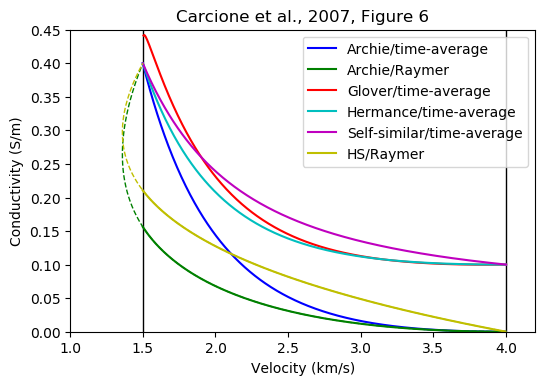

In [5]:
fig6 = plt.figure(6)

plt.axvline(data['vp_s'], linewidth=1, color='k')
plt.axvline(data['vp_f'], linewidth=1, color='k')
plt.plot(vp_b, sig_at, 'b-', label='Archie/time-average')
plt.plot(vel_ar, 1./rho_0, 'g--', linewidth=1)
plt.plot(vp_b, sig_ar, 'g-', label='Archie/Raymer')
plt.plot(vp_b[1:], 1./rho_gt[1:], 'r-', label='Glover/time-average')
plt.plot(vp_b, 1./rho_ht, 'c-', label='Hermance/time-average')
plt.plot(vp_b, 1./rho_st, 'm-', label='Self-similar/time-average')
plt.plot(vel_br, 1./rho_0, 'y--', linewidth=1)
plt.plot(vp_b, sig_br, 'y-', label='HS/Raymer')

plt.legend()
plt.title("Carcione et al., 2007, Figure 6")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Conductivity (S/m)")
plt.axis([1.0, 4.2, 0.0, 0.45])

plt.show()

Figure 6. Cross-property relations for different models of the overburden (shale saturated with brine).

### Original Figure 6

![title](Figure6.jpg)

## Figure 7

**Important**: Equation (49) in Carcione et al is wrong. It is given as
$$
v_P = 2.2888\left(Z\frac{\sigma}{\sigma_f}\right)^{1/6}\ ,
$$
where the P-wave velocity $v_P$ is in km/s, depth $Z$ in km, and the conductivities in S/m.

However, the correct equation is
$$
v_P = 2.2888\left(Z\frac{\sigma_f}{\sigma}\right)^{1/6}\ ,
$$
as for instance given in *The Rock Physics Handbook* by Mavko et al., 2009.


Looking at the figures you might think hey, the curve from the equation in Carcione et al (original figure) looks much better then the curve from the equation by Mavko et al (my figure). It is misleading. The Faust-equation is a function of depth. So the curve will change depending at which depth you are. The other curves are not. So the different curves can not be compared just like that without taking other aspects into the analysis too.

### Calculation

In [6]:
data2 = vel2res.carc_tab1('sand')
vel2res.carc_der(data2, 500)

data2['a_k'] = np.array(-3)
data2['a_f'] = np.array(1.)
data2['m_e'] = np.array(2.)
data2['p_e'] = np.array(.15)
data2['depth'] = np.array(2.)

rho_b2 = data2['rho_b']
vp_b2  = data2['vp_b']

# Calculation
rho_gt2 = vel2res.in2por2out(data2, vel2res.por_v_harm, vel2res.rho_glov)
rho_ht2 = vel2res.in2por2out(data2, vel2res.por_v_harm, vel2res.rho_herm)
rho_st2 = vel2res.in2por2out(data2, vel2res.por_v_harm, vel2res.rho_self)

vel_ghe2 = vel2res.in2por2out(data2, vel2res.por_r_herm, vel2res.vp_gass)
rho_ghe2 = vel2res.in2por2out(data2, vel2res.por_v_gass, vel2res.rho_herm)

vel_gcr2 = vel2res.in2por2out(data2, vel2res.por_r_crim, vel2res.vp_gass)
rho_gcr2 = vel2res.in2por2out(data2, vel2res.por_v_gass, vel2res.rho_crim)

vel_gss2 = vel2res.in2por2out(data2, vel2res.por_r_self, vel2res.vp_gass)
rho_gss2 = vel2res.in2por2out(data2, vel2res.por_v_gass, vel2res.rho_self)

vel_ghm2 = vel2res.in2por2out(data2, vel2res.por_r_hslb, vel2res.vp_gass)
vel_ghp2 = vel2res.in2por2out(data2, vel2res.por_r_hsub, vel2res.vp_gass)
rho_ghm2 = vel2res.in2por2out(data2, vel2res.por_v_gass, vel2res.rho_hsub)
rho_ghp2 = vel2res.in2por2out(data2, vel2res.por_v_gass, vel2res.rho_hslb)

rho_ft2 = vel2res.rho_faus(data2)

### Plot

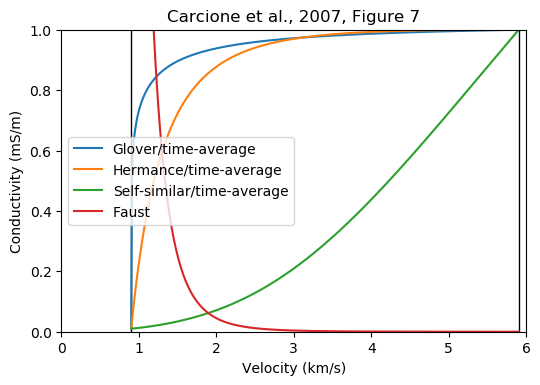

In [7]:
# PLOT NON-GASSMANN RELATIONS
fig7 = plt.figure(7)

plt.axvline(data2['vp_s'], linewidth=1, color='k')
plt.axvline(data2['vp_f'], linewidth=1, color='k')
plt.plot(vp_b2, 1000./rho_gt2, '-', label='Glover/time-average')
plt.plot(vp_b2, 1000./rho_ht2, '-', label='Hermance/time-average')
plt.plot(vp_b2, 1000./rho_st2, '-', label='Self-similar/time-average')
plt.plot(vp_b2, 1000./rho_ft2, '-', label='Faust')

plt.legend()
plt.title("Carcione et al., 2007, Figure 7")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Conductivity (mS/m)")
plt.axis([0.0, 6.0, 0.0, 1])
plt.show()

Figure 7. Cross-property relations for different models of the reservoir (sandstone saturated with oil). Archie-based relations are not shown because the conductivity is negligible (it is assumed that $\sigma_s$ = 0). The Faust curve corresponds to 2-km depth.


**Note:** Y-axis in Figures 7 and 8 by a factor 10 different from Carcione. -> This is a typo in the paper, either in the plot or in Table 1. And again, the Faust-curve by Carcione is wrong, see my comment above.

### Original Figure 7
![title](Figure7.jpg)

## Figure 8

### Calculation
Was done above together with Figure 6.

### Plot

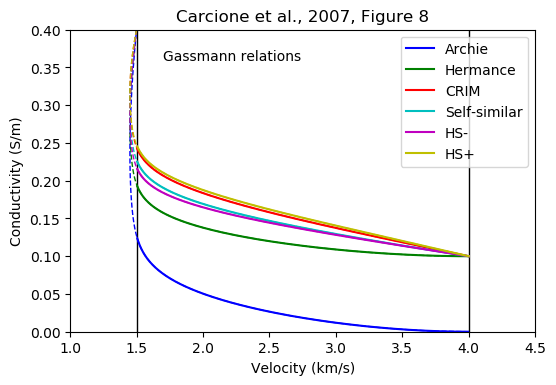

In [8]:
# PLOT GASSMANN RELATIONS
fig8 = plt.figure(8)

plt.axvline(data['vp_s'], linewidth=1, color='k')
plt.axvline(data['vp_f'], linewidth=1, color='k')
plt.plot(vel_gar, 1./rho_0, 'b--', linewidth=1)
plt.plot(vp_b[1:], sig_gar[1:], 'b-', label='Archie')
plt.plot(vel_ghe, 1./rho_b, 'g--', linewidth=1)
plt.plot(vp_b[1:], 1./rho_ghe[1:], 'g-', label='Hermance')
plt.plot(vel_gcr, 1./rho_b, 'r--', linewidth=1)
plt.plot(vp_b[1:], 1./rho_gcr[1:], 'r-', label='CRIM')
plt.plot(vel_gss, 1./rho_b, 'c--', linewidth=1)
plt.plot(vp_b[1:], 1./rho_gss[1:], 'c-', label='Self-similar')
plt.plot(vel_ghm, 1./rho_b, 'm--', linewidth=1)
plt.plot(vp_b[1:], 1./rho_ghm[1:], 'm-', label='HS-')
plt.plot(vel_ghp, 1./rho_b, 'y--', linewidth=1)
plt.plot(vp_b[1:], 1./rho_ghp[1:], 'y-', label='HS+')

plt.legend(loc=1)
plt.text(1.7, .36, 'Gassmann relations')
plt.title("Carcione et al., 2007, Figure 8")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Conductivity (S/m)")
plt.axis([1.0, 4.5, 0.0, 0.4])
plt.show()

Figure 8. Cross-property relations for different conductivity models of the overburden (shale saturated with brine), combined with the Gassmann equation. The dashed lines correspond to the HS bounds.

### Original Figure 8
![title](Figure8.jpg)

## Figure 9


### Calculation
Was done above together with Figure 7.

### Plot

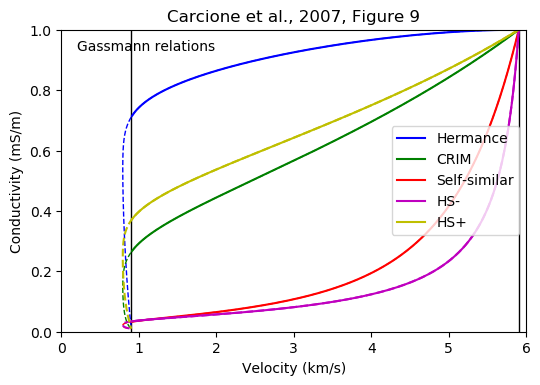

In [9]:
# PLOT GASSMANN RELATIONS
fig9 = plt.figure(9)

plt.axvline(data2['vp_s'], linewidth=1, color='k')
plt.axvline(data2['vp_f'], linewidth=1, color='k')

plt.plot(vel_ghe2, 1000./rho_b2, 'b--', linewidth=1)
plt.plot(vp_b2[1:], 1000./rho_ghe2[1:], 'b-', label='Hermance')
plt.plot(vel_gcr2, 1000./rho_b2, 'g--', linewidth=1)
plt.plot(vp_b2[1:], 1000./rho_gcr2[1:], 'g-', label='CRIM')
plt.plot(vel_gss2, 1000./rho_b2, 'r--', linewidth=1)
plt.plot(vp_b2[1:], 1000./rho_gss2[1:], 'r-', label='Self-similar')
plt.plot(vel_ghm2, 1000./rho_b2, 'm--')
plt.plot(vp_b2[1:], 1000./rho_ghm2[1:], 'm-', label='HS-')
plt.plot(vel_ghp2, 1000./rho_b2, 'y--')
plt.plot(vp_b2[1:], 1000./rho_ghp2[1:], 'y-', label='HS+')

plt.legend(loc=5)
plt.text(.2, .93, 'Gassmann relations')
plt.title("Carcione et al., 2007, Figure 9")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Conductivity (mS/m)")
plt.axis([0.0, 6.0, 0.0, 1])

plt.show()

Figure 9. Cross-property relations for different conductivity models of the reservoir (sandstone saturated with oil), combined with the Gassmann equation. The dashed lines correspond to the HS bounds.

### Original Figure 9

![title](Figure9.jpg)